## (30%) Training a sequence classifier for MNIST data

Let’s train an RNN to classify MNIST images. A convolutional neural network would
be better suited for image classification (see Chapter 13), but this makes for a simple
example that you are already familiar with. We will treat each image as a sequence of
28 rows of 28 pixels each (since each MNIST image is 28 × 28 pixels). 
Your can design your own cell with some numbers of recurrent neurons (a parameter to tune) with a fully connected layer containing 10 neurons (one per class) connected to the output of the last time step. You can begin with a single layer.

In [1]:
import keras

Using TensorFlow backend.


Let's first bring the data in

In [2]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# normalize pixel values
X_train = X_train / 255
X_test = X_test / 255

In [4]:
model = keras.models.Sequential()

model.add(keras.layers.recurrent.SimpleRNN(50, input_shape=(28,28)))
model.add(keras.layers.Dense(units=10))
model.add(keras.layers.Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
train_model = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.8898 - acc: 0.7104 - val_loss: 0.5557 - val_acc: 0.8150
Epoch 2/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.4489 - acc: 0.8631 - val_loss: 0.3486 - val_acc: 0.9015
Epoch 3/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.3304 - acc: 0.9020 - val_loss: 0.2936 - val_acc: 0.9139
Epoch 4/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.2730 - acc: 0.9197 - val_loss: 0.2523 - val_acc: 0.9292
Epoch 5/10
60000/60000 [==============================] - 13s 211us/step - loss: 0.2402 - acc: 0.9295 - val_loss: 0.2350 - val_acc: 0.9312
Epoch 6/10
60000/60000 [==============================] - 15s 254us/step - loss: 0.2244 - acc: 0.9339 - val_loss: 0.2017 - val_acc: 0.9443
Epoch 7/10
60000/60000 [==============================] - 18s 298us/st

In [7]:
evaluation = model.evaluate(X_test, y_test)
print("Single Layer RNN accuracy = " + str(evaluation[1]))

10000/10000 [==============================] - 4s 438us/step
Single Layer RNN accuracy = 0.9422


That is pretty good.

## Can you try Multi-layer RNN? 

Let's do the same example with multiple layers of RNN

In [8]:
model_multi = keras.models.Sequential()

model_multi.add(keras.layers.recurrent.SimpleRNN(16, input_shape=(28,28), return_sequences=True))
model_multi.add(keras.layers.recurrent.SimpleRNN(32, return_sequences=True))
model_multi.add(keras.layers.recurrent.SimpleRNN(64))
model_multi.add(keras.layers.Dense(units=10))
model_multi.add(keras.layers.Activation('softmax'))

In [9]:
model_multi.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
train_model_multi = model_multi.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 31s 524us/step - loss: 0.6231 - acc: 0.8098 - val_loss: 0.2530 - val_acc: 0.9323
Epoch 2/10
60000/60000 [==============================] - 39s 652us/step - loss: 0.2428 - acc: 0.9291 - val_loss: 0.1857 - val_acc: 0.9468
Epoch 3/10
60000/60000 [==============================] - 39s 654us/step - loss: 0.1872 - acc: 0.9451 - val_loss: 0.1672 - val_acc: 0.9510
Epoch 4/10
60000/60000 [==============================] - 37s 619us/step - loss: 0.1582 - acc: 0.9544 - val_loss: 0.1337 - val_acc: 0.9627
Epoch 5/10
60000/60000 [==============================] - 38s 631us/step - loss: 0.1417 - acc: 0.9590 - val_loss: 0.1248 - val_acc: 0.9637
Epoch 6/10
60000/60000 [==============================] - 37s 621us/step - loss: 0.1293 - acc: 0.9624 - val_loss: 0.1203 - val_acc: 0.9647
Epoch 7/10
60000/60000 [==============================] - 37s 624us/step - loss: 0.1149 - acc: 0.9675 - val_loss: 0.

In [11]:
evaluation_multi = model_multi.evaluate(X_test, y_test)
print("Multi Layer RNN accuracy = " + str(evaluation_multi[1]))

10000/10000 [==============================] - 14s 1ms/step
Multi Layer RNN accuracy = 0.9721


## (30%) Time series prediction by RNN.

Assume time series is $t * sin(t) / 3 + 2 * sin(t*5)$, the problem is to design a RNN model to generate prediction as closer to the original one. You may sample randomly of 20 consecutive values from the time series, and apply your model to generate 20 predicted values to see how closer of your predict values and the original one. 

First, let's plot the time series given by the question.

In [12]:
import numpy as np

def time_series(t):
    return t * (np.sin(t)/3) + 2*np.sin(t*5)

In [13]:
t_val = np.arange(100, step=0.1) #total of 1000 points

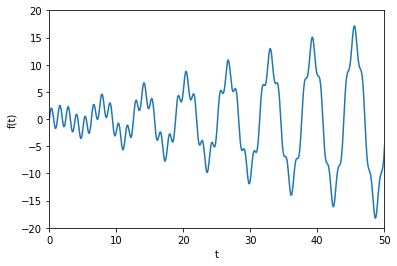

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# showing only t = [0,50]
plt.xlim(0,50)
plt.ylim(-20,20)
plt.plot(t_val, time_series(t_val))
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

Let's take some random 20 consecutive points.  
For the ease of the problem, i will just select time from [20:22].

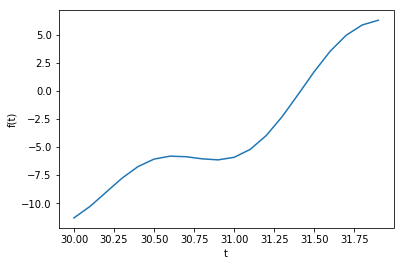

In [15]:
t_30_32_val = np.arange(30, 32, step=0.1) # total of 20 points

plt.plot(t_30_32_val, time_series(t_30_32_val))
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

Let's create an RNN model

In [16]:
training_set = time_series(t_val)
training_set = training_set.reshape(training_set.shape[0], 1)

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))

train_sc = scaler.fit_transform(training_set)

In [18]:
X_train = []
y_train = []
for i in range(1, len(train_sc)):
    X_train.append(train_sc[i-1:i, 0])
    y_train.append(train_sc[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [19]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [20]:
model_ts_lstm = keras.models.Sequential()

model_ts_lstm.add(keras.layers.LSTM(units=50, input_shape=(X_train.shape[1],1), return_sequences=True))
model_ts_lstm.add(keras.layers.Dropout(0.2))
model_ts_lstm.add(keras.layers.LSTM(units=50, return_sequences=True))
model_ts_lstm.add(keras.layers.Dropout(0.2))
model_ts_lstm.add(keras.layers.LSTM(units=50, return_sequences=True))
model_ts_lstm.add(keras.layers.Dropout(0.2))
model_ts_lstm.add(keras.layers.LSTM(units=50))
model_ts_lstm.add(keras.layers.Dropout(0.2))
model_ts_lstm.add(keras.layers.Dense(units=1))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
model_ts_lstm.compile(loss='mean_squared_error', optimizer='adam')

In [22]:
model_ts_lstm.fit(X_train, y_train, epochs=10, batch_size=1)

Epoch 1/10
999/999 [==============================] - 23s 23ms/step - loss: 0.0253
Epoch 2/10
999/999 [==============================] - 22s 22ms/step - loss: 0.0068
Epoch 3/10
999/999 [==============================] - 20s 20ms/step - loss: 0.0070
Epoch 4/10
999/999 [==============================] - 20s 20ms/step - loss: 0.0068
Epoch 5/10
999/999 [==============================] - 20s 20ms/step - loss: 0.0072
Epoch 6/10
999/999 [==============================] - 21s 21ms/step - loss: 0.0069
Epoch 7/10
999/999 [==============================] - 20s 20ms/step - loss: 0.0065
Epoch 8/10
999/999 [==============================] - 20s 20ms/step - loss: 0.0068
Epoch 9/10
999/999 [==============================] - 20s 20ms/step - loss: 0.0065
Epoch 10/10
999/999 [==============================] - 22s 22ms/step - loss: 0.0066


In [23]:
# let's get some test data to see
# let's pull out those t = [30:32] points from the dataset and store it into test set.
X_test = X_train[300:320,:,0]

In [24]:
# to test our LSTM model, the input shape must be 3D
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [25]:
y_test = model_ts_lstm.predict(X_test)

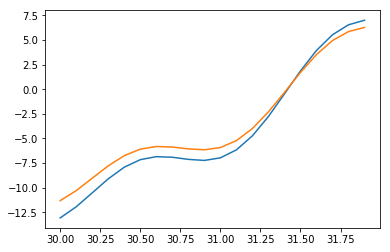

In [26]:
plt.plot(t_val[300:320], scaler.inverse_transform(y_test))
# let's scale down the original ones to see if they match
plt.plot(t_val[300:320], time_series(t_30_32_val))
plt.show()

very similar!

## You can also try your model with any other new initial  sequence of values to generate more creative new time series. (music generations)

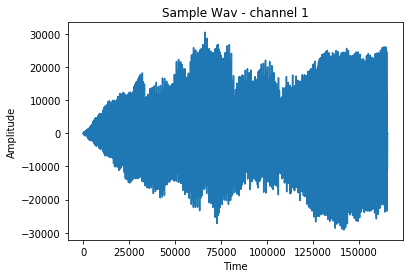

In [27]:
from scipy.io.wavfile import read, write

# read audio samples
input_data = read("cello.wav") # one i downloaded for myself
audio = input_data[1]
# plot all samples
plt.plot(audio[:,0])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav - channel 1")
# display the plot
plt.show()

In [28]:
audio.shape

(165375, 2)

The reason for them having 2 colors is that the music file has 2 channels.  
It makes sense since we have two ears.  

Let's take some sample points to train.

In [29]:
# let's first consider for the first channel.
# and take half of the entire waves.
music_train_set = audio[:(audio.shape[0]//2),0]
music_train_set = music_train_set.reshape(music_train_set.shape[0], 1)

In [30]:
music_train_set.shape

(82687, 1)

In [31]:
music_train_sc = scaler.fit_transform(music_train_set)

C:\Users\swlee\Anaconda3\envs\cmpe258\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int16 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [32]:
X_music_train = []
y_music_train = []
for i in range(1, len(music_train_sc)):
    X_music_train.append(music_train_sc[i-1:i, 0])
    y_music_train.append(music_train_sc[i,0])
    
X_music_train, y_music_train = np.array(X_music_train), np.array(y_music_train)

In [33]:
X_music_train = np.reshape(X_music_train, (X_music_train.shape[0], X_music_train.shape[1], 1))

In [34]:
X_music_train.shape

(82686, 1, 1)

In [35]:
#using the same LSTM model with different input shape
model_music_lstm = keras.models.Sequential()

model_music_lstm.add(keras.layers.LSTM(units=50, input_shape=(X_music_train.shape[1],1), return_sequences=True))
model_music_lstm.add(keras.layers.Dropout(0.2))
model_music_lstm.add(keras.layers.LSTM(units=50, return_sequences=True))
model_music_lstm.add(keras.layers.Dropout(0.2))
model_music_lstm.add(keras.layers.LSTM(units=50, return_sequences=True))
model_music_lstm.add(keras.layers.Dropout(0.2))
model_music_lstm.add(keras.layers.LSTM(units=50))
model_music_lstm.add(keras.layers.Dropout(0.2))
model_music_lstm.add(keras.layers.Dense(units=1))

In [36]:
model_music_lstm.compile(loss='mean_squared_error', optimizer='adam')

In [37]:
model_music_lstm.fit(X_music_train, y_music_train, epochs=3, batch_size=128)

Epoch 1/3
82686/82686 [==============================] - 15s 185us/step - loss: 0.0075
Epoch 2/3
82686/82686 [==============================] - 13s 152us/step - loss: 0.0017
Epoch 3/3
82686/82686 [==============================] - 13s 163us/step - loss: 0.0016


In [38]:
x_test_set = audio[(audio.shape[0]//2):,0]
x_test_set = x_test_set.reshape(x_test_set.shape[0], 1)
music_test_sc = scaler.fit_transform(x_test_set)

X_music_test = []
y_music_test = []
for i in range(1, len(music_test_sc)):
    X_music_test.append(music_test_sc[i-1:i, 0])
    y_music_test.append(music_test_sc[i,0])
    
X_music_test, y_music_test = np.array(X_music_test), np.array(y_music_test)

X_music_test = np.reshape(X_music_test, (X_music_test.shape[0], X_music_test.shape[1], 1))

y_test = model_music_lstm.predict(X_music_test)

C:\Users\swlee\Anaconda3\envs\cmpe258\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int16 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


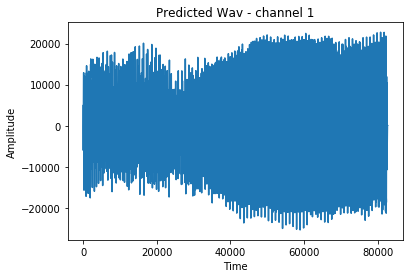

In [39]:
y_test_convertback = scaler.inverse_transform(y_test)
# plot all samples
plt.plot(y_test_convertback)
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Predicted Wav - channel 1")
# display the plot
plt.show()

In [40]:
write("test.wav", 44100, y_test_convertback)

After listening to the generated output wav, it is... more like an electric guitar. haha.

## (10%) Try LSTM cell to classify MNIST data and compare with previous results. 

In [52]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# normalize pixel values
X_train = X_train / 255
X_test = X_test / 255

In [53]:
model_lstm = keras.models.Sequential()

model_lstm.add(keras.layers.recurrent.LSTM(128, input_shape=(X_train.shape[1:]), activation='relu'))
model_lstm.add(keras.layers.Dropout(rate=0.8))
model_lstm.add(keras.layers.Dense(units=10))
model_lstm.add(keras.layers.Activation('softmax'))

In [54]:
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
train_model_lstm = model_lstm.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 440us/step - loss: 1.2373 - acc: 0.5675 - val_loss: 0.3641 - val_acc: 0.8878
Epoch 2/10
60000/60000 [==============================] - 25s 422us/step - loss: 0.4247 - acc: 0.8731 - val_loss: 0.2349 - val_acc: 0.9310
Epoch 3/10
60000/60000 [==============================] - 28s 474us/step - loss: 0.2689 - acc: 0.9246 - val_loss: 0.1469 - val_acc: 0.9589
Epoch 4/10
60000/60000 [==============================] - 32s 529us/step - loss: 0.2056 - acc: 0.9440 - val_loss: 0.1174 - val_acc: 0.9695
Epoch 5/10
60000/60000 [==============================] - 32s 536us/step - loss: 0.1715 - acc: 0.9539 - val_loss: 0.1152 - val_acc: 0.9696
Epoch 6/10
60000/60000 [==============================] - 35s 577us/step - loss: 0.1458 - acc: 0.9607 - val_loss: 0.1262 - val_acc: 0.9659
Epoch 7/10
60000/60000 [==============================] - 30s 494us/step - loss: 0.1443 - acc: 0.9621 - val_loss: 0.

In [56]:
evaluation_lstm = model_lstm.evaluate(X_test, y_test)
print("LSTM Layer RNN accuracy = " + str(evaluation_lstm[1]))

10000/10000 [==============================] - 7s 669us/step
LSTM Layer RNN accuracy = 0.9778


## (15%) Words embeddings from data set (http://mattmahoney.net/dc/text8.zip) and plot them. For example, if the model is told that “I drink milk” is a valid sentence, and if it knows that “milk” is close to “water” but far from “shoes,”

In [58]:
import os
# import modules & set up logging
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

class ReadMyFiles(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            for line in open(os.path.join(self.dirname, fname)):
                yield line.split()

sentences = ReadMyFiles(os.path.join(os.getcwd(), 'text8')) # a memory-friendly iterator
model = gensim.models.Word2Vec(sentences, size=100, window=20, min_count=100, workers=4)

2019-04-20 19:37:53,403 : INFO : collecting all words and their counts
2019-04-20 19:37:55,465 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-04-20 19:37:58,424 : INFO : collected 253854 word types from a corpus of 17005207 raw words and 1 sentences
2019-04-20 19:37:58,424 : INFO : Loading a fresh vocabulary
2019-04-20 19:37:58,518 : INFO : effective_min_count=100 retains 11815 unique words (4% of original 253854, drops 242039)
2019-04-20 19:37:58,519 : INFO : effective_min_count=100 leaves 15471435 word corpus (90% of original 17005207, drops 1533772)
2019-04-20 19:37:58,551 : INFO : deleting the raw counts dictionary of 253854 items
2019-04-20 19:37:58,717 : INFO : sample=0.001 downsamples 38 most-common words
2019-04-20 19:37:58,718 : INFO : downsampling leaves estimated 11139872 word corpus (72.0% of prior 15471435)
2019-04-20 19:37:58,777 : INFO : estimated required memory for 11815 words and 100 dimensions: 15359500 bytes
2019-04-20 19:37:58,777 :

In [59]:
print(model.wv.similarity('milk', 'water'), model.wv.similarity('milk', 'shoes'))

0.11608268 -0.11088006


This tells us that milk is more related to water than shoes.

For plotting purpose, our model with min_count=100 are taking forever to plot.  
Therefore, I switched to min_count=2000, just to visualize how they look.

In [60]:
model_2 = gensim.models.Word2Vec(sentences, size=100, window=20, min_count=2000, workers=4)

2019-04-20 19:39:50,344 : INFO : collecting all words and their counts
2019-04-20 19:39:52,020 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-04-20 19:39:55,870 : INFO : collected 253854 word types from a corpus of 17005207 raw words and 1 sentences
2019-04-20 19:39:55,872 : INFO : Loading a fresh vocabulary
2019-04-20 19:39:55,992 : INFO : effective_min_count=2000 retains 871 unique words (0% of original 253854, drops 252983)
2019-04-20 19:39:55,993 : INFO : effective_min_count=2000 leaves 11189643 word corpus (65% of original 17005207, drops 5815564)
2019-04-20 19:39:55,997 : INFO : deleting the raw counts dictionary of 253854 items
2019-04-20 19:39:56,192 : INFO : sample=0.001 downsamples 45 most-common words
2019-04-20 19:39:56,192 : INFO : downsampling leaves estimated 6395769 word corpus (57.2% of prior 11189643)
2019-04-20 19:39:56,195 : INFO : estimated required memory for 871 words and 100 dimensions: 1132300 bytes
2019-04-20 19:39:56,195 : INF

In [61]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\swlee\Anaconda3\envs\cmpe258\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


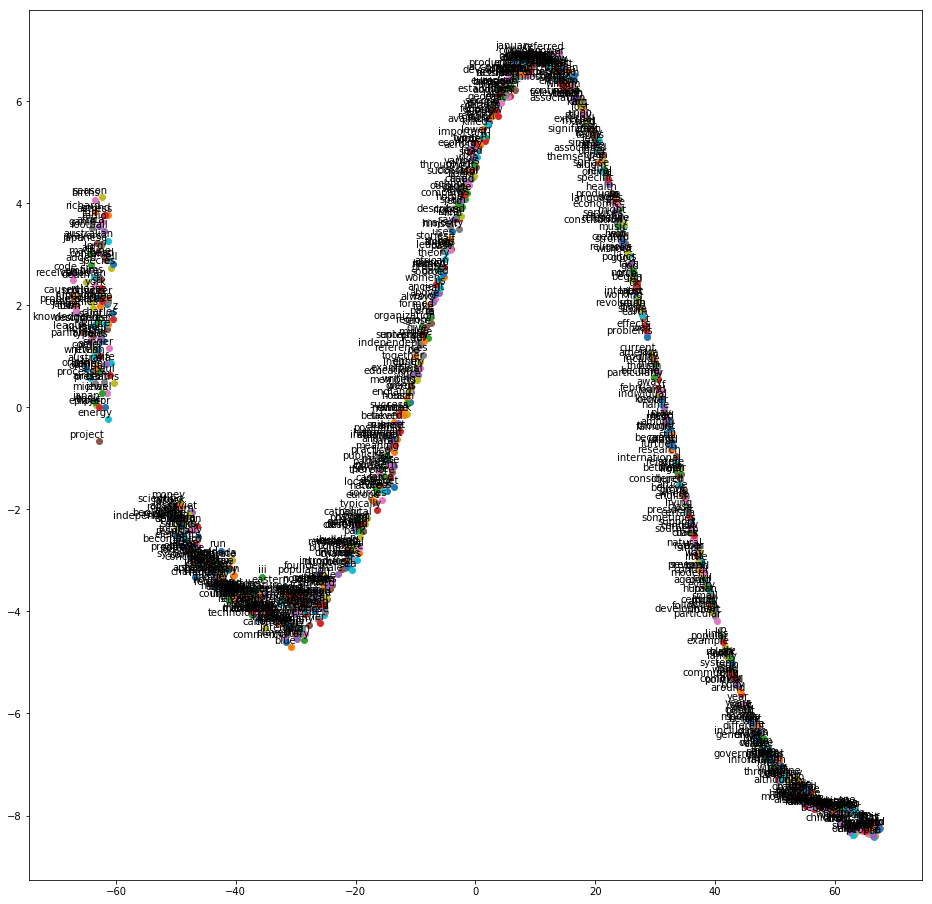

In [62]:
from sklearn.manifold import TSNE

tsne_plot(model_2)

Looks cool and it somehow looks like a sine wave. 
My question is how do they look like this?

## (15%) Embedded Reber Grammars

Embedded Reber grammars were used by Hochreiter and Schmidhuber in their paper about LSTMs. They are artificial grammars that produce strings such as
“BPBTSXXVPSEPE.” Check out Jenny Orr’s nice introduction to this topic.
Choose a particular embedded Reber grammar (such as the one represented on Jenny Orr’s page), then train an RNN to identify whether a string respects that
grammar or not. You will first need to write a function capable of generating a
training batch containing about 50% strings that respect the grammar, and 50%
that don’t.

The code was mainly borrowed from this github repo (https://github.com/irhumshafkat/LSTM-Embedded-Reber-Grammar-Detector).

In [63]:
"""Helper functions that generate a single string
   following Embedded Reber Grammar"""

import random

# Returns the non-embedded, internal string
def reber_prime():

    string = "B"
    luck = random.random()

    if luck < 0.5:
        string = reber_phase_a(string)
        luck = random.random()
        if luck < 0.5:
            string += "X"
            string = reber_phase_b(string)
        else:
            string += "SE"

    else:
        string += "P"
        string = reber_phase_b(string)

    return string


# Returns a portion of the string corresponding to the top half of the graph
def reber_phase_a(string):
    string += "T"
    luck = random.random()

    while luck < 0.5:
        string += "S"
        luck = random.random()

    string += "X"

    return string


# Returns a portion of the string corresponding to the bottom half of the graph
def reber_phase_b(string):
    string += "T"
    luck = random.random()

    while luck < 0.5:
        string += "T"
        luck = random.random()

    string += "V"

    luck = random.random()
    if luck < 0.5:
        string += "P"
        luck = random.random()
        if luck < 0.5:
            string += "X"
            string = reber_phase_b(string)
        else:
            string += "SE"

    else:
        string += "VE"

    return string

# Returns a complete, embedded reber grammar string
def embedded_reber():
    string = "B"
    luck = random.random()

    if luck < 0.5:
        string += "P"
        string += reber_prime()
        string += "PE"

    else:
        string += "T"
        string += reber_prime()
        string += "TE"

    return string

In [64]:
# Returns the non-embedded, internal string
def reber_prime_bad():

    string = "B"
    luck = random.random()

    if luck < 0.5:
        string = reber_phase_a_bad(string)
        luck = random.random()
        if luck < 0.5:
            string += "T"
            string = reber_phase_b_bad(string)
        else:
            string += "SE"

    else:
        string += "P"
        string = reber_phase_b_bad(string)

    return string

# Returns a portion of the string corresponding to the top half of the graph
def reber_phase_a_bad(string):
    string += "X"
    luck = random.random()

    while luck < 0.5:
        string += "S"
        luck = random.random()

    string += "P"

    return string

# Returns a portion of the string corresponding to the bottom half of the graph
def reber_phase_b_bad(string):
    string += "T"
    luck = random.random()

    while luck < 0.5:
        string += "T"
        luck = random.random()

    string += "V"

    luck = random.random()
    if luck < 0.5:
        string += "PE"
        luck = random.random()
        if luck < 0.5:
            string += "X"
            string = reber_phase_b_bad(string)
        else:
            string += "SE"

    else:
        string += "VE"

    return string

# Returns a complete, false embedded reber grammar string
def embedded_reber_bad():
    string = "B"
    luck = random.random()

    if luck < 0.5:
        string += "P"
        string += reber_prime_bad()
        luck = random.random()
        if luck < 0.5:
            string += "PE"
        else:
            string += "TE"

    else:
        string += "T"
        string += reber_prime_bad()
        if luck < 0.5:
            string += "TE"
        else:
            string += "PE"

    return string

In [65]:
import numpy as np
import tensorflow as tf

tf.reset_default_graph()

dataset_size = 10000
true_percent = 0.5
true_count = int(dataset_size*true_percent)
false_count = dataset_size - true_count

# Generate the dataset of strings and corresponding labels
dataset = np.zeros(shape=[0, 2])
for i in range(true_count):
    unit = np.array((embedded_reber(), 0))
    dataset = np.vstack((dataset, unit))

for j in range(false_count):
    unit = np.array((embedded_reber_bad(), 1))
    dataset = np.vstack((dataset, unit))

rand_indices = np.random.permutation(dataset_size)
dataset = dataset[rand_indices]

# Split into strings and labels
X_dat = dataset[:, 0]
y_dat = dataset[:, 1]
max_len = max([len(i) for i in X_dat])

# converts string into a sparse matrix
def sparserizer(word, length= -20):
    if length == -20:
        length = len(word)
    sparse = np.zeros(shape=[7, length])

    for i in range(len(word)):
        letter = word[i]
        sparsecol = sparse[:, i]
        if letter == "B":
            sparsecol[0] = 1
        if letter == "E":
            sparsecol[1] = 1
        if letter == "P":
            sparsecol[2] = 1
        if letter == "S":
            sparsecol[3] = 1
        if letter == "T":
            sparsecol[4] = 1
        if letter == "V":
            sparsecol[5] = 1
        if letter == "X":
            sparsecol[6] = 1

    return sparse


# converts a batch of strings into a sparse matrix
def batch_sparse(dataset, batch_size, batch_num):
    words = X_dat[batch_size * batch_num:batch_size * batch_num + batch_size]
    y = y_dat[batch_size * batch_num:batch_size * batch_num + batch_size]
    lens = [len(s) for s in words]
    length = max_len
    sparse_table = np.zeros(shape=[0, 7])
    for word in words:
        sparse_table = np.vstack((sparse_table, sparserizer(word, length).transpose()))

    sparse_table = np.reshape(sparse_table, [-1, length, 7])
    return sparse_table, y, lens


# Building the Tensorflow Graph

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, max_len, 7])
y = tf.placeholder(tf.int32, [None])
lens = tf.placeholder(tf.int32, [None])
basic_cell = tf.contrib.rnn.GRUCell(num_units=170)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32, sequence_length=lens)

logits = tf.layers.dense(states, 2)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                          logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

# Preparing the execution phase
n_epochs = 10
batch_size = 40
num_batches = dataset_size // batch_size

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(num_batches - 2):
            X_batch, y_batch, lens_batch = batch_sparse(X_dat, batch_size, iteration)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, lens: lens_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch, lens: lens_batch})
        X_test, y_test, lens_test = batch_sparse(X_dat, batch_size, num_batches - 1)
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test, lens: lens_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    saver.save(sess, "my_reber_model")


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.


2019-04-20 19:46:01,106 : WARNING : From <ipython-input-65-1849e7d3b6e6>:77: GRUCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.


Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


2019-04-20 19:46:01,111 : WARNING : From <ipython-input-65-1849e7d3b6e6>:78: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


Instructions for updating:
Use keras.layers.dense instead.


2019-04-20 19:46:01,378 : WARNING : From <ipython-input-65-1849e7d3b6e6>:80: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.


0 Train accuracy: 0.925 Test accuracy: 0.85
1 Train accuracy: 0.95 Test accuracy: 0.9
2 Train accuracy: 0.95 Test accuracy: 0.875
3 Train accuracy: 0.95 Test accuracy: 0.9
4 Train accuracy: 1.0 Test accuracy: 0.925
5 Train accuracy: 1.0 Test accuracy: 0.95
6 Train accuracy: 1.0 Test accuracy: 0.95
7 Train accuracy: 1.0 Test accuracy: 0.95
8 Train accuracy: 0.95 Test accuracy: 0.9
9 Train accuracy: 1.0 Test accuracy: 0.95
